<a href="https://colab.research.google.com/github/Pradeepjha88/Cardiac_attack_prediction/blob/master/FS_house_price_pred_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
df = pd.read_csv("data/train.csv")

In [ ]:
df.describe()
#to show and analyse data

,id,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.721000e+04,1.721000e+04,17210.000000,17210.000000,1.721000e+04,17210.000000,17210.000000,17210.000000,17210.000000,17210.000000,17210.000000,17210.000000,17210.000000,17210.000000,17210.000000,17210.000000,17210.000000,17210.000000
mean,4.584539e+09,5.391069e+05,3.373213,2080.172051,1.513545e+04,1.498605,0.008077,3.409587,7.661941,1788.108077,292.063974,1971.285880,84.305985,98077.903661,47.559731,-122.213991,1987.480244,12785.612028
std,2.874471e+09,3.674218e+05,0.927616,917.995097,4.260361e+04,0.542192,0.089509,0.646909,1.170044,824.994890,443.397892,29.378191,401.454725,53.554500,0.138973,0.140486,684.866281,27294.470122
min,1.000102e+06,7.800000e+04,1.000000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.125570e+09,3.200000e+05,3.000000,1420.000000,5.034000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1952.000000,0.000000,98033.000000,47.468925,-122.328000,1490.000000,5100.000000
50%,3.904980e+09,4.500000e+05,3.000000,1910.000000,7.620000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000
75%,7.308600e+09,6.400000e+05,4.000000,2550.000000,1.070075e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678175,-122.125000,2368.250000,10092.000000
max,9.900000e+09,7.700000e+06,33.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
#New features that we can introduce:::::>


###Age of renovation
#Age of home
#Month of sell(Festivity)
#year of sell
#increase or decrease in sqft living and lot after renovation
#distance from center of city
#Percentage of living from the lot=====> Privacy Index
#avg area per room
#price / sqft_living , price / sqft_lot 
#price / bedroom
#avg area per floor
#terrace ==> if 0.5 floor
#bedroom per / floor --> round it off
#convert zipcodes based on frequency of occurrence :: frequency encoding
#

In [ ]:
df = df.drop(['yr_renovated'],axis=1)

In [ ]:
df['log_price'] = np.log(df['price'])

In [ ]:
df = df.drop(['price'],axis=1)

In [ ]:
df.dtypes

id                 int64
date              object
bedrooms           int64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
log_price        float64
dtype: object

In [ ]:
datestring='10/13/2014'
dt = datetime.strptime(datestring, '%m/%d/%Y')
print(dt.year, dt.month, dt.day)

2014 10 13


In [ ]:
pd.to_datetime(df['date'],format='%m/%d/%Y')
df['yr_sell'] = pd.DatetimeIndex(df['date']).year
df['m_sell'] = pd.DatetimeIndex(df['date']).month
print(df[['yr_sell','m_sell']].head())

   yr_sell  m_sell
0     2014      10
1     2015       4
2     2014       5
3     2014       9
4     2014       7


In [ ]:
df['Age_of_Home']=df['yr_sell']-df['yr_built']
print(df['Age_of_Home'].head())

0    114
1      4
2     -1
3     84
4     16
Name: Age_of_Home, dtype: int64


In [ ]:
print(df[df['Age_of_Home']<0])
#these are problematic houses as the year built is after year sold

              id        date  bedrooms  sqft_living  sqft_lot  floors  \
2     6169901185   5/20/2014         5         4460      2975     3.0   
35    5694500840  11/25/2014         2         1650       960     3.0   
277   2770601530   8/26/2014         2         1570      1269     2.0   
1326  1257201420    7/9/2014         4         3730      4560     2.0   
2946  9126100346   6/17/2014         3         1380      3600     3.0   
5254  9520900210  12/31/2014         5         2730      6401     2.0   
6827  1832100030   6/25/2014         4         3570      8250     2.0   
7845  3076500830  10/29/2014         1          710      6000     1.5   
9650  9310300160   8/28/2014         5         2990      9240     2.0   

      waterfront  condition  grade  sqft_above  ...  yr_built  zipcode  \
2              0          3     10        3280  ...      2015    98119   
35             0          3      8        1350  ...      2015    98103   
277            0          3      9        1280 

The next 4 cells are not to be considered, as this was done before realising that year of renovation is a wrong column

In [ ]:
df.loc[df['yr_sell']>=2015, 'sqft_living_sell'] = df.loc[df['yr_sell']>=2015,'sqft_living15']
df.loc[df['yr_sell']<2015,'sqft_living_sell'] = df.loc[df['yr_sell']<2015,'sqft_living']
df.loc[df['yr_sell']>=2015,'sqft_lot_sell'] = df.loc[df['yr_sell']>=2015,'sqft_lot15']
df.loc[df['yr_sell']<2015,'sqft_lot_sell'] = df.loc[df['yr_sell']<2015,'sqft_lot']

In [ ]:
df = df.drop(['sqft_living15','sqft_living','sqft_lot15','sqft_lot'],axis=1)

In [ ]:
df['Percentage_used']=df['sqft_living_sell']/df['sqft_lot_sell']*100
# print(df['Percentage_used'])
print(df[df['Percentage_used']>100].head())
print(df[df['Percentage_used']>100].shape)
#655 columns have more sqft_living than sqft_lot

           id        date  bedrooms  floors  waterfront  condition  grade  \
0  9828702895  10/22/2014         4     1.5           0          3      7   
1  2559950110   4/22/2015         2     3.0           0          3     11   
2  6169901185   5/20/2014         5     3.0           0          3     10   
3  3667500015   9/25/2014         4     2.5           0          3      9   
4  5167000140   7/11/2014         3     2.0           0          3     11   

   sqft_above  sqft_basement  yr_built  zipcode      lat     long  log_price  \
0        2420              0      1900    98112  47.6209 -122.302  13.458836   
1        1910            560      2011    98112  47.6182 -122.312  14.022525   
2        3280           1180      2015    98119  47.6313 -122.370  13.102161   
3        2670           1010      1930    98112  47.6192 -122.307  13.554146   
4        2280           1420      1998    98033  47.6653 -122.205  14.207553   

   yr_sell  m_sell  Age_of_Home  sqft_living_sell  sqft_

In [ ]:
df['log_price'].describe() 
#to analyse the max price

count    17210.000000
mean        13.044580
std          0.528797
min         11.264464
25%         12.676076
50%         13.017003
75%         13.369223
max         15.856731
Name: log_price, dtype: float64

In [ ]:
#to find the position of the most expensive house
b=df[df['log_price']==df['log_price'].max()]
b[['long','lat']]

,long,lat
15154,-122.323,47.6298


In [ ]:
df.shape

(17210, 20)

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'floors', 'waterfront', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat',
       'long', 'yr_sell', 'm_sell', 'Age_of_Home', 'sqft_living_sell',
       'sqft_lot_sell', 'Percentage_used'],
      dtype='object')

In [ ]:
df.head()

,id,date,price,bedrooms,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,yr_sell,m_sell,Age_of_Home,sqft_living_sell,sqft_lot_sell,Percentage_used
0,9828702895,10/22/2014,700000,4,1.5,0,3,7,2420,0,1900,98112,47.6209,-122.302,2014,10,114,2420.0,520.0,465.384615
1,2559950110,4/22/2015,1230000,2,3.0,0,3,11,1910,560,2011,98112,47.6182,-122.312,2015,4,4,2440.0,1229.0,198.535395
2,6169901185,5/20/2014,490000,5,3.0,0,3,10,3280,1180,2015,98119,47.6313,-122.370,2014,5,-1,4460.0,2975.0,149.915966
3,3667500015,9/25/2014,770000,4,2.5,0,3,9,2670,1010,1930,98112,47.6192,-122.307,2014,9,84,3680.0,2242.0,164.139161
4,5167000140,7/11/2014,1480000,3,2.0,0,3,11,2280,1420,1998,98033,47.6653,-122.205,2014,7,16,3700.0,2264.0,163.427562


In [ ]:
#so now we have the latitude and longitude of the most expensive house
#aim to find all the distances(in km) between the most expensive house and all the houses
def dist(lat1,long1):
    R = 6373.0 #Radius of earth
    lat1 = np.deg2rad(lat1)
    lon1 = np.deg2rad(long1)
    lat2 = np.deg2rad(47.6298)
    lon2 = np.deg2rad(-122.323)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    d = R * c
    return(d)

Distance = dist(df['lat'], df['long'])

df['Distance']= Distance

In [ ]:
df.drop(df[df['Age_of_Home']<0].index, inplace=True)
print(df[df['Age_of_Home']<0].shape)
#To remove the 9 rows which have yr build after yr sold


(0, 21)


In [ ]:
def drop_improper_yr_sold(df):
    df.drop(df[df['Age_of_Home']<0].index, inplace=True)
    print(df[df['Age_of_Home']<0].shape)
    return df

In [ ]:
df.head()

,id,date,price,bedrooms,floors,waterfront,condition,grade,sqft_above,sqft_basement,...,zipcode,lat,long,yr_sell,m_sell,Age_of_Home,sqft_living_sell,sqft_lot_sell,Percentage_used,Distance
0,9828702895,10/22/2014,700000,4,1.5,0,3,7,2420,0,...,98112,47.6209,-122.302,2014,10,114,2420.0,520.0,465.384615,1.859672
1,2559950110,4/22/2015,1230000,2,3.0,0,3,11,1910,560,...,98112,47.6182,-122.312,2015,4,4,2440.0,1229.0,198.535395,1.531285
3,3667500015,9/25/2014,770000,4,2.5,0,3,9,2670,1010,...,98112,47.6192,-122.307,2014,9,84,3680.0,2242.0,164.139161,1.681926
4,5167000140,7/11/2014,1480000,3,2.0,0,3,11,2280,1420,...,98033,47.6653,-122.205,2014,7,16,3700.0,2264.0,163.427562,9.683869
5,9544700500,5/8/2014,785000,3,2.0,0,3,9,3010,0,...,98075,47.5836,-121.994,2014,5,3,3010.0,1842.0,163.409338,25.202130


In [ ]:
df.corr().head()

,id,price,bedrooms,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,yr_sell,m_sell,Age_of_Home,sqft_living_sell,sqft_lot_sell,Percentage_used,Distance
id,1.000000,-0.022739,0.001181,0.016783,-0.007897,-0.025301,0.005104,-0.010693,-0.003908,0.024120,-0.015051,-0.004903,0.026569,0.007532,-0.007698,-0.024002,-0.011472,-0.134000,0.088279,0.011578
price,-0.022739,1.000000,0.305626,0.258460,0.266807,0.035738,0.672325,0.605912,0.328029,0.053810,-0.052470,0.307886,0.017660,0.005141,-0.010281,-0.053731,0.674655,0.081224,0.105824,-0.323487
bedrooms,0.001181,0.305626,1.000000,0.173096,-0.013916,0.026405,0.350691,0.478500,0.297422,0.148213,-0.154664,-0.007931,0.133293,-0.007840,-0.004518,-0.148345,0.522689,0.031495,-0.003274,0.046416
floors,0.016783,0.258460,0.173096,1.000000,0.027262,-0.262543,0.453807,0.518583,-0.246554,0.488797,-0.053669,0.056833,0.116654,-0.010648,0.002739,-0.488994,0.324276,-0.008006,0.536185,-0.021745
waterfront,-0.007897,0.266807,-0.013916,0.027262,1.000000,0.021114,0.087725,0.073615,0.080811,-0.023936,0.027672,-0.015161,-0.042818,0.001327,0.004143,0.023959,0.105545,0.022359,-0.034788,-0.006083


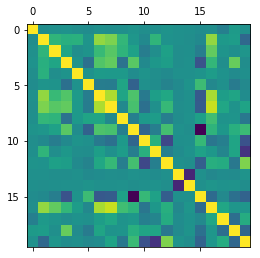

In [ ]:
plt.matshow(df.corr())

In [ ]:
d={}
for i in range(1,13,1):
    d[i]=df[df['m_sell']==i].shape[0]
print(d)
#month wise distribution of house sold
#seattle has snowfall in nov,dec,jan,feb
#m_sell here has one to 12 values which represents an ordinal variable. 
#In future we can have Onehotencoding

{1: 769, 2: 967, 3: 1476, 4: 1736, 5: 1895, 6: 1747, 7: 1802, 8: 1563, 9: 1439, 10: 1522, 11: 1117, 12: 1168}


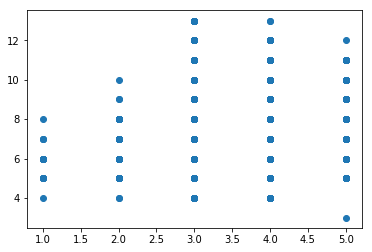

In [ ]:
plt.scatter(df['condition'], df['grade'])

In [ ]:
df.corr()['price'].sort_values(ascending=False)

price               1.000000
sqft_living_sell    0.674655
grade               0.672325
sqft_above          0.605912
sqft_basement       0.328029
lat                 0.307886
bedrooms            0.305626
waterfront          0.266807
floors              0.258460
Percentage_used     0.105824
sqft_lot_sell       0.081224
yr_built            0.053810
condition           0.035738
long                0.017660
yr_sell             0.005141
m_sell             -0.010281
id                 -0.022739
zipcode            -0.052470
Age_of_Home        -0.053731
Distance           -0.323487
Name: price, dtype: float64

In [ ]:
#so we should to take some particular features accordingg to correaltion
#So we see max and min and generally 

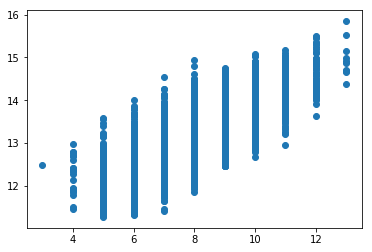

In [ ]:
plt.scatter(df['grade'], df['log_price'])

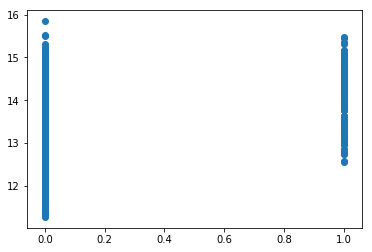

In [ ]:
plt.scatter(df['waterfront'], df['log_price'])

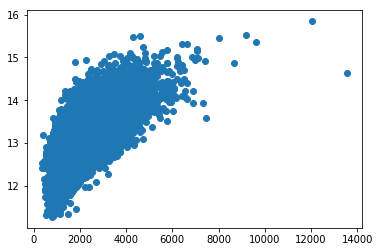

In [ ]:
plt.scatter(df['sqft_living_sell'], df['log_price'])

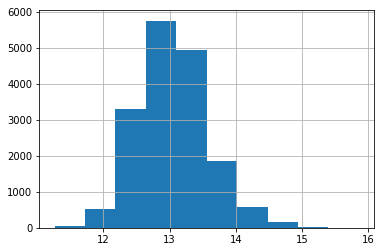

In [ ]:
df['log_price'].hist()

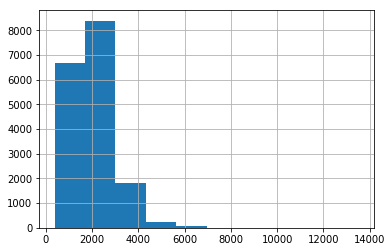

In [ ]:
df['sqft_living_sell'].hist()

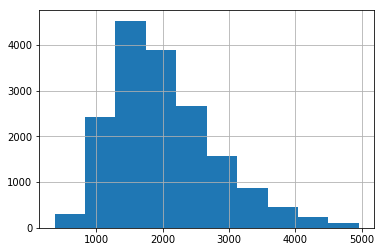

In [ ]:
df[df['sqft_living_sell'] < 5000]['sqft_living_sell'].hist()

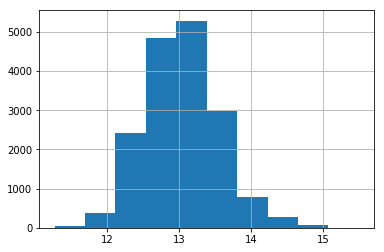

In [ ]:
df[df['sqft_living_sell'] < 5000]['log_price'].hist()

In [ ]:
df[df['sqft_living_sell']>=5000].shape[0]

132

Removing Outliers based on sqft_living

In [ ]:
df1 = df[df['sqft_living_sell']<=4000]

In [ ]:
df1.corr()['log_price'].sort_values(ascending=False)

log_price           1.000000
grade               0.661264
sqft_living_sell    0.622141
sqft_above          0.540870
lat                 0.470397
bedrooms            0.304119
floors              0.288814
sqft_basement       0.271819
Percentage_used     0.179906
waterfront          0.151937
sqft_lot_sell       0.071137
yr_built            0.054492
condition           0.044673
yr_sell             0.031770
long                0.030444
id                  0.004213
zipcode            -0.011053
m_sell             -0.034434
Age_of_Home        -0.053995
Distance           -0.422821
Name: log_price, dtype: float64

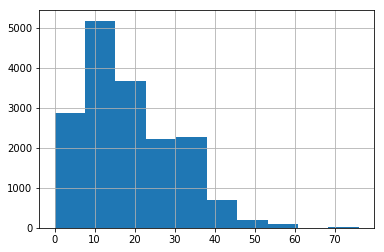

In [ ]:
df['Distance'].hist()

In [ ]:
df2 = df[df['Distance']<=40]
df2.corr()['price'].sort_values(ascending=False)

KeyError: 'price'

In [ ]:
# We tried to remove the outliers but there is no significant change

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [ ]:
#First Approach
#Regression on most correlated features with price
#1(a)abs value of corr > 0.5
#1(b)abs value of corr > 0.3
#1(c)All columns except id,date,zipcode,lat,long

#1(a)

In [ ]:
df_1a=df[['price','sqft_living_sell','grade','sqft_above']]
df_1a.head()

,price,sqft_living_sell,grade,sqft_above
0,700000,2420.0,7,2420
1,1230000,2440.0,11,1910
3,770000,3680.0,9,2670
4,1480000,3700.0,11,2280
5,785000,3010.0,9,3010


In [ ]:
X=df_1a.iloc[:,1:]
Y=df_1a.iloc[:,0:1]

In [ ]:
from sklearn.model_selection import\
train_test_split
# Split Training and Testing Data
X_train,X_test,Y_train,Y_test = \
train_test_split(X,Y,test_size = 0.25,\
                 random_state=1)

In [ ]:
regr = linear_model.LinearRegression()

In [ ]:
regr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
Y_pred = regr.predict(X_test)

In [ ]:
Y_pred.shape

(4301, 1)

In [ ]:
print('Coefficients: \n', regr.coef_)
mse=mean_squared_error(Y_test, Y_pred)
print('Mean Squared Error',mse)
print('Root Mean Square Error',mse**0.5)

Coefficients: 
 [[ 1.77774217e+02  1.21851514e+05 -1.26371459e+01]]
Mean Squared Error 58432120093.578705
Root Mean Square Error 241727.36728301723


In [ ]:
#1(b)

In [ ]:
df_1b=df[['price','sqft_living_sell','grade','sqft_above','sqft_basement','bedrooms','Distance']]
df_1b.head()

,price,sqft_living_sell,grade,sqft_above,sqft_basement,bedrooms,Distance
0,700000,2420.0,7,2420,0,4,1.859672
1,1230000,2440.0,11,1910,560,2,1.531285
3,770000,3680.0,9,2670,1010,4,1.681926
4,1480000,3700.0,11,2280,1420,3,9.683869
5,785000,3010.0,9,3010,0,3,25.202130


In [ ]:
X=df_1b.iloc[:,1:]
Y=df_1b.iloc[:,0:1]

In [ ]:
from sklearn.model_selection import\
train_test_split
# Split Training and Testing Data
X_train,X_test,Y_train,Y_test = \
train_test_split(X,Y,test_size = 0.25,\
                 random_state=1)

In [ ]:
regr = linear_model.LinearRegression()

In [ ]:
regr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
Y_pred = regr.predict(X_test)

In [ ]:
Y_pred.shape

(4301, 1)

In [ ]:
print('Coefficients: \n', regr.coef_)
mse=mean_squared_error(Y_test, Y_pred)
print('Mean Squared Error',mse)
print('Root Mean Square Error',mse**0.5)

Coefficients: 
 [[ 3.29479607e+01  7.26549474e+04  2.17850373e+02  2.09794782e+02
  -4.21583608e+04 -1.10852004e+04]]
Mean Squared Error 41676208923.64903
Root Mean Square Error 204147.51755446117


In [ ]:
#1(c)

In [ ]:
df_1c=df.drop(['zipcode','lat','long','id','date','m_sell','yr_sell'],axis=1)

In [ ]:
X=df_1c.iloc[:,1:]
Y=df_1c.iloc[:,0:1]

In [ ]:
from sklearn.model_selection import\
train_test_split
# Split Training and Testing Data
X_train,X_test,Y_train,Y_test = \
train_test_split(X,Y,test_size = 0.25,\
                 random_state=1)

In [ ]:
regr = linear_model.LinearRegression()

In [ ]:
regr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
Y_pred = regr.predict(X_test)

In [ ]:
Y_pred.shape

(4301, 1)

In [ ]:
print('Coefficients: \n', regr.coef_)
mse=mean_squared_error(Y_test, Y_pred)
print('Mean Squared Error',mse)
print('Root Mean Square Error',mse**0.5)

Coefficients: 
 [[-3.43677781e+04 -1.78067771e+04  7.11116041e+05  3.57826409e+04
   9.44793656e+04  2.10056300e+02  1.61551150e+02  3.52722791e+04
   3.65612495e+04  3.33912496e+01  1.92707350e-01 -1.68171799e+02
  -1.03132779e+04]]
Mean Squared Error 34381404385.67273
Root Mean Square Error 185422.23271677195


In [ ]:
df_1d=df_1c

In [ ]:
X=df_1d.iloc[:,1:]
Y=df_1d.iloc[:,0:1]

In [ ]:
from sklearn.model_selection import train_test_split
# Split Training and Testing Data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,random_state=1)

In [ ]:
from sklearn.feature_selection import RFE
regr = linear_model.LinearRegression()

In [ ]:
rfe = RFE(estimator=regr,n_features_to_select=(X_train.shape[1]-1))

In [ ]:
Y_train = np.array(Y_train)

In [ ]:
model = rfe.fit(X_train, Y_train)

/home/shantanu/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
rfe.n_features_

12

In [ ]:
rfe.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1])

In [ ]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True])

In [ ]:
X.shape

(17201, 13)

In [ ]:
X.columns

Index(['bedrooms', 'floors', 'waterfront', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'Age_of_Home', 'sqft_living_sell',
       'sqft_lot_sell', 'Percentage_used', 'Distance'],
      dtype='object')

In [ ]:
X_train.columns[rfe.support_]

Index(['bedrooms', 'floors', 'waterfront', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'Age_of_Home', 'sqft_living_sell',
       'Percentage_used', 'Distance'],
      dtype='object')

In [ ]:
df_1d=df[['price','bedrooms', 'floors', 'waterfront', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'Age_of_Home', 'sqft_living_sell',
       'Percentage_used', 'Distance']]
df_1d.head()

,price,bedrooms,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,Age_of_Home,sqft_living_sell,Percentage_used,Distance
0,700000,4,1.5,0,3,7,2420,0,1900,114,2420.0,465.384615,1.859672
1,1230000,2,3.0,0,3,11,1910,560,2011,4,2440.0,198.535395,1.531285
3,770000,4,2.5,0,3,9,2670,1010,1930,84,3680.0,164.139161,1.681926
4,1480000,3,2.0,0,3,11,2280,1420,1998,16,3700.0,163.427562,9.683869
5,785000,3,2.0,0,3,9,3010,0,2011,3,3010.0,163.409338,25.202130


In [ ]:
X=df_1d.iloc[:,1:]
Y=df_1d.iloc[:,0:1]

In [ ]:
from sklearn.model_selection import train_test_split
# Split Training and Testing Data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,random_state=1)

In [ ]:
from sklearn.feature_selection import RFE
regr = linear_model.LinearRegression()

In [ ]:
regr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
Y_pred = regr.predict(X_test)

In [ ]:
Y_pred.shape

(4301, 1)

In [ ]:
print('Coefficients: \n', regr.coef_)
mse=mean_squared_error(Y_test, Y_pred)
print('Mean Squared Error',mse)
print('Root Mean Square Error',mse**0.5)

Coefficients: 
 [[-3.52844526e+04 -1.61187104e+04  7.09467305e+05  3.56562537e+04
   9.44381671e+04  2.10746217e+02  1.63034775e+02  3.48015051e+04
   3.60982137e+04  3.43689250e+01 -2.47736034e+02 -1.02152245e+04]]
Mean Squared Error 34464719218.50502
Root Mean Square Error 185646.75924589962


In [ ]:
#Second Approach
#We will find out principle components using known variables
#2(a)Principle component analysis
#2(b)Indepent component analysis

In [ ]:
a=2
print(a)